# Kropki Sudoku
We attempt to solve a [Sudoku with Kropki dots](https://www.funwithpuzzles.com/2018/02/kropki-or-dots--sudoku-puzzle.html) using Gröbner bases as part of Section 4.3. However, due to the shear computational power needed to find a Gröbner basis and solve for over 900 polynomial equations, it is not feasible to run on a standard laptop. The code is presented below.

In [1]:
from sympy import *
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
puzzle = np.asarray(
    [
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0],
    ]
)

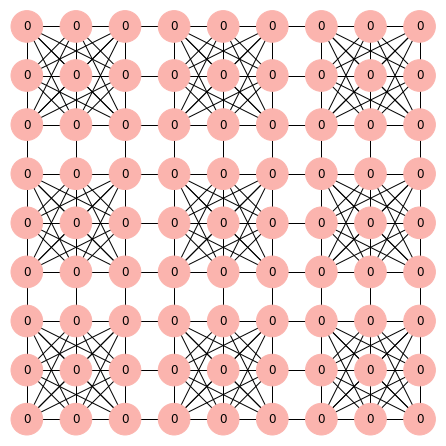

In [3]:
# https://networkx.org/nx-guides/content/generators/sudoku.html

n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# we map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

plt.figure(figsize=(6, 6))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()

In [4]:
# initialises variables to solve for
var('x')
vertices = [Symbol('x' + str(i), real=True) for i in list(G.nodes)]
edges = [(vertices[i], vertices[j]) for i, j in list(G.edges)]

In [5]:
# ideal I_S generated by the quotient method 
ideal_s = []

def F_i(x, n):
    prod = 1
    for i in range(1,n+1):
        prod *= (x-i)
    return prod

for x in vertices:
    ideal_s.append(F_i(x,9))
for i,j in edges:
    H_ij,_ = div(F_i(i,9) - F_i(j,9), i-j)
    ideal_s.append(H_ij)
    
# kropki constraints
puzzle_clues_white_dots = [(Symbol('x1') - Symbol('x10'))*(Symbol('x1') + Symbol('x10')) + 1, 
                           (Symbol('x4') - Symbol('x13'))*(Symbol('x4') + Symbol('x13')) + 1,
                           (Symbol('x7') - Symbol('x16'))*(Symbol('x7') + Symbol('x16')) + 1,
                           (Symbol('x8') - Symbol('x17'))*(Symbol('x8') + Symbol('x17')) + 1,
                           (Symbol('x9') - Symbol('x10'))*(Symbol('x9') + Symbol('x10')) + 1,
                           (Symbol('x9') - Symbol('x18'))*(Symbol('x9') + Symbol('x18')) + 1,
                           (Symbol('x11') - Symbol('x20'))*(Symbol('x11') + Symbol('x20')) + 1,
                           (Symbol('x14') - Symbol('x23'))*(Symbol('x14') + Symbol('x23')) + 1,
                           (Symbol('x15') - Symbol('x24'))*(Symbol('x15') + Symbol('x24')) + 1,
                           (Symbol('x19') - Symbol('x28'))*(Symbol('x19') + Symbol('x28')) + 1,
                           (Symbol('x21') - Symbol('x22'))*(Symbol('x21') + Symbol('x22')) + 1,
                           (Symbol('x26') - Symbol('x35'))*(Symbol('x26') + Symbol('x35')) + 1,
                           (Symbol('x27') - Symbol('x36'))*(Symbol('x27') + Symbol('x36')) + 1,
                           (Symbol('x32') - Symbol('x41'))*(Symbol('x32') + Symbol('x41')) + 1,
                           (Symbol('x37') - Symbol('x38'))*(Symbol('x37') + Symbol('x38')) + 1,
                           (Symbol('x39') - Symbol('x48'))*(Symbol('x39') + Symbol('x48')) + 1,
                           (Symbol('x42') - Symbol('x43'))*(Symbol('x42') + Symbol('x43')) + 1,
                           (Symbol('x44') - Symbol('x53'))*(Symbol('x44') + Symbol('x53')) + 1,
                           (Symbol('x49') - Symbol('x58'))*(Symbol('x49') + Symbol('x58')) + 1,
                           (Symbol('x54') - Symbol('x63'))*(Symbol('x54') + Symbol('x63')) + 1,
                           (Symbol('x56') - Symbol('x65'))*(Symbol('x56') + Symbol('x65')) + 1,
                           (Symbol('x57') - Symbol('x58'))*(Symbol('x57') + Symbol('x58')) + 1,
                           (Symbol('x57') - Symbol('x66'))*(Symbol('x57') + Symbol('x66')) + 1,
                           (Symbol('x59') - Symbol('x68'))*(Symbol('x59') + Symbol('x68')) + 1,
                           (Symbol('x60') - Symbol('x69'))*(Symbol('x60') + Symbol('x69')) + 1,
                           (Symbol('x71') - Symbol('x80'))*(Symbol('x71') + Symbol('x80')) + 1]

puzzle_clues_black_dots = [(Symbol('x10')-2*Symbol('x11'))*(2*Symbol('x10')-Symbol('x11')),
                          (Symbol('x10')-2*Symbol('x19'))*(2*Symbol('x10')-Symbol('x19')),
                          (Symbol('x18')-2*Symbol('x27'))*(2*Symbol('x18')-Symbol('x27')),
                          (Symbol('x31')-2*Symbol('x40'))*(2*Symbol('x31')-Symbol('x40')),
                          (Symbol('x32')-2*Symbol('x33'))*(2*Symbol('x32')-Symbol('x33')),
                          (Symbol('x36')-2*Symbol('x45'))*(2*Symbol('x36')-Symbol('x45')),
                          (Symbol('x65')-2*Symbol('x66'))*(2*Symbol('x65')-Symbol('x66')),
                          (Symbol('x77')-2*Symbol('x78'))*(2*Symbol('x77')-Symbol('x78'))]

ideal = ideal_s + puzzle_clues_white_dots + puzzle_clues_black_dots

In [ ]:
solution_s = solve(ideal, vertices)
solution_s

In [ ]:
g_basis_s = groebner(ideal_s + puzzle_clues_white_dots + puzzle_clues_black_dots)

# check whether there is a solution, i.e., V(I) != emptyset
g_basis_s != [1]